In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
import os
import scipy.stats as stats

In [2]:
# pomocna trieda na analyzu dotaznika
class Person:
    def __init__(self, idx, img, gender, categ):
        self.idx, self.img = idx, img
        self.gender, self.categ = gender, categ
        
        self.raw_answers = raw_data.iloc[:,idx+9].values
        self.answers = np.array(sorted(self.raw_answers)[3:-3])
        
        self.mean = np.mean(self.answers)
        self.ci = tuple(stats.bootstrap((self.answers,), np.mean, axis=0).confidence_interval)

In [4]:
# nacitanie dat a informacii o osobach
raw_data = pd.read_csv("files/dotaznik_final_data.csv", sep=";")
people = []

for i,fn in enumerate(os.listdir("img/faces_input")):
    img = cv.imread(f"img/faces_input/{fn}")
    gender = "man" if "M" in fn else "woman"
    categ = "young" if "a" in fn else ("old" if "c" in fn else "mid")
    people.append(Person(i, img, gender, categ))
    
people = sorted(people, key=lambda x: x.mean)
men = [person for person in people if person.gender == "man"]
women = [person for person in people if person.gender == "woman"]

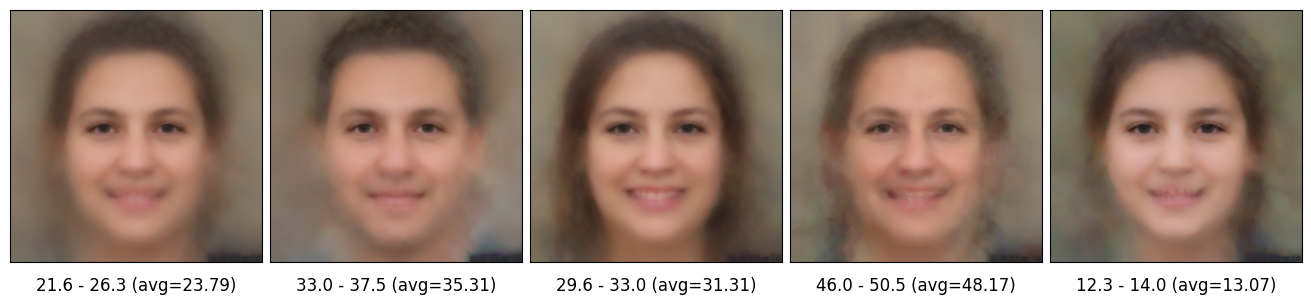

In [8]:
# nacitanie vystupnych obrazkov + vykreslenie s odhadmi veku
avg_all = Person(-6,cv.imread(f"img/faces_output/all_oda.png"), None, None)
avg_men = Person(-5,cv.imread(f"img/faces_output/men_oda.png"), None, None)
avg_women = Person(-4,cv.imread(f"img/faces_output/women_oda.png"), None, None)
avg_old = Person(-3,cv.imread(f"img/faces_output/old_oda.png"), None, None)
avg_young = Person(-2,cv.imread(f"img/faces_output/young_oda.png"), None, None)

fig, ax = plt.subplots(1,5, figsize=(13,3), constrained_layout=True)
for i,person in enumerate([avg_all,avg_men, avg_women, avg_old, avg_young]):
    plt.setp(ax[i], xticks=[], yticks=[])
    ax[i].imshow(cv.cvtColor(person.img, cv.COLOR_BGR2RGB))
    ax[i].set_title(f"{person.ci[0]:.1f} - {person.ci[1]:.1f} (avg={person.mean:.2f})", y=-0.15, fontsize=12)
plt.show()

In [9]:
# vypis do tabulky
print(f"ALL:\tE(age())={np.mean([p.mean for p in people]):.2f}\t\tage(E())={avg_all.mean:.2f} ({avg_all.ci[0]:.2f} - {avg_all.ci[1]:.2f})")
print(f"MEN:\tE(age())={np.mean([p.mean for p in people if p.gender == 'man']):.2f}\t\tage(E())={avg_men.mean:.2f} ({avg_men.ci[0]:.2f} - {avg_men.ci[1]:.2f})")
print(f"WOMEN:\tE(age())={np.mean([p.mean for p in people if p.gender == 'woman']):.2f}\t\tage(E())={avg_women.mean:.2f} ({avg_women.ci[0]:.2f} - {avg_women.ci[1]:.2f})")

print(f"YOUNG:\tE(age())={np.mean([p.mean for p in people if p.categ == 'young']):.2f}\t\tage(E())={avg_young.mean:.2f} ({avg_young.ci[0]:.2f} - {avg_young.ci[1]:.2f})")
print(f"OLD:\tE(age())={np.mean([p.mean for p in people if p.categ == 'old']):.2f}\t\tage(E())={avg_old.mean:.2f} ({avg_old.ci[0]:.2f} - {avg_old.ci[1]:.2f})")

ALL:	E(age())=33.19		age(E())=23.79 (21.62 - 26.31)
MEN:	E(age())=33.94		age(E())=35.31 (33.03 - 37.48)
WOMEN:	E(age())=32.44		age(E())=31.31 (29.59 - 33.03)
YOUNG:	E(age())=17.13		age(E())=13.07 (12.28 - 13.97)
OLD:	E(age())=47.67		age(E())=48.17 (45.97 - 50.48)


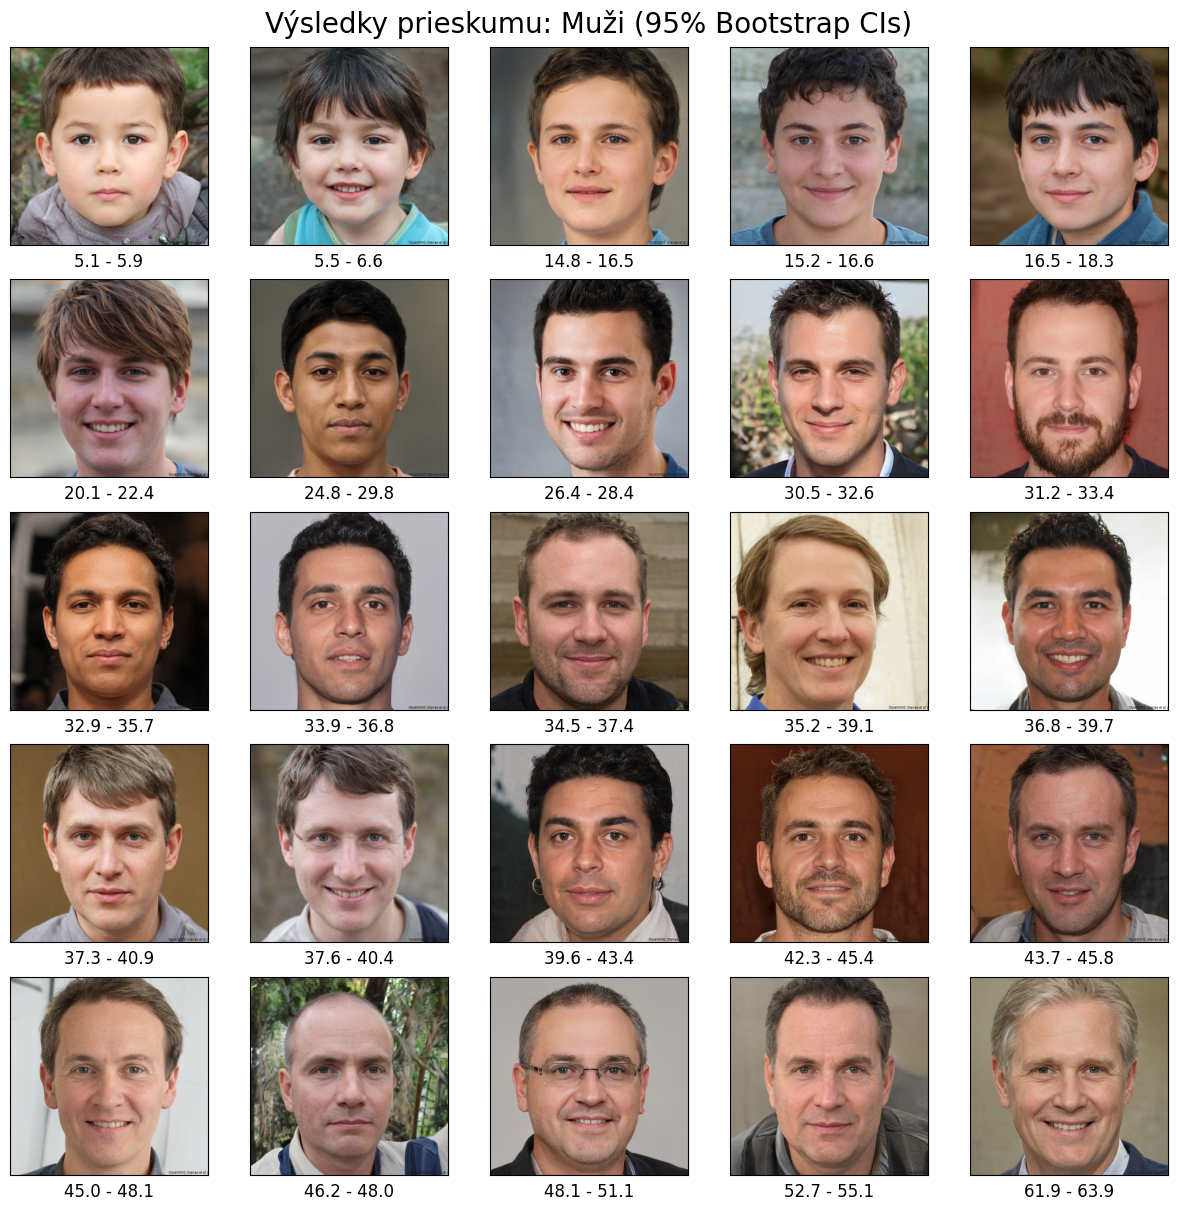

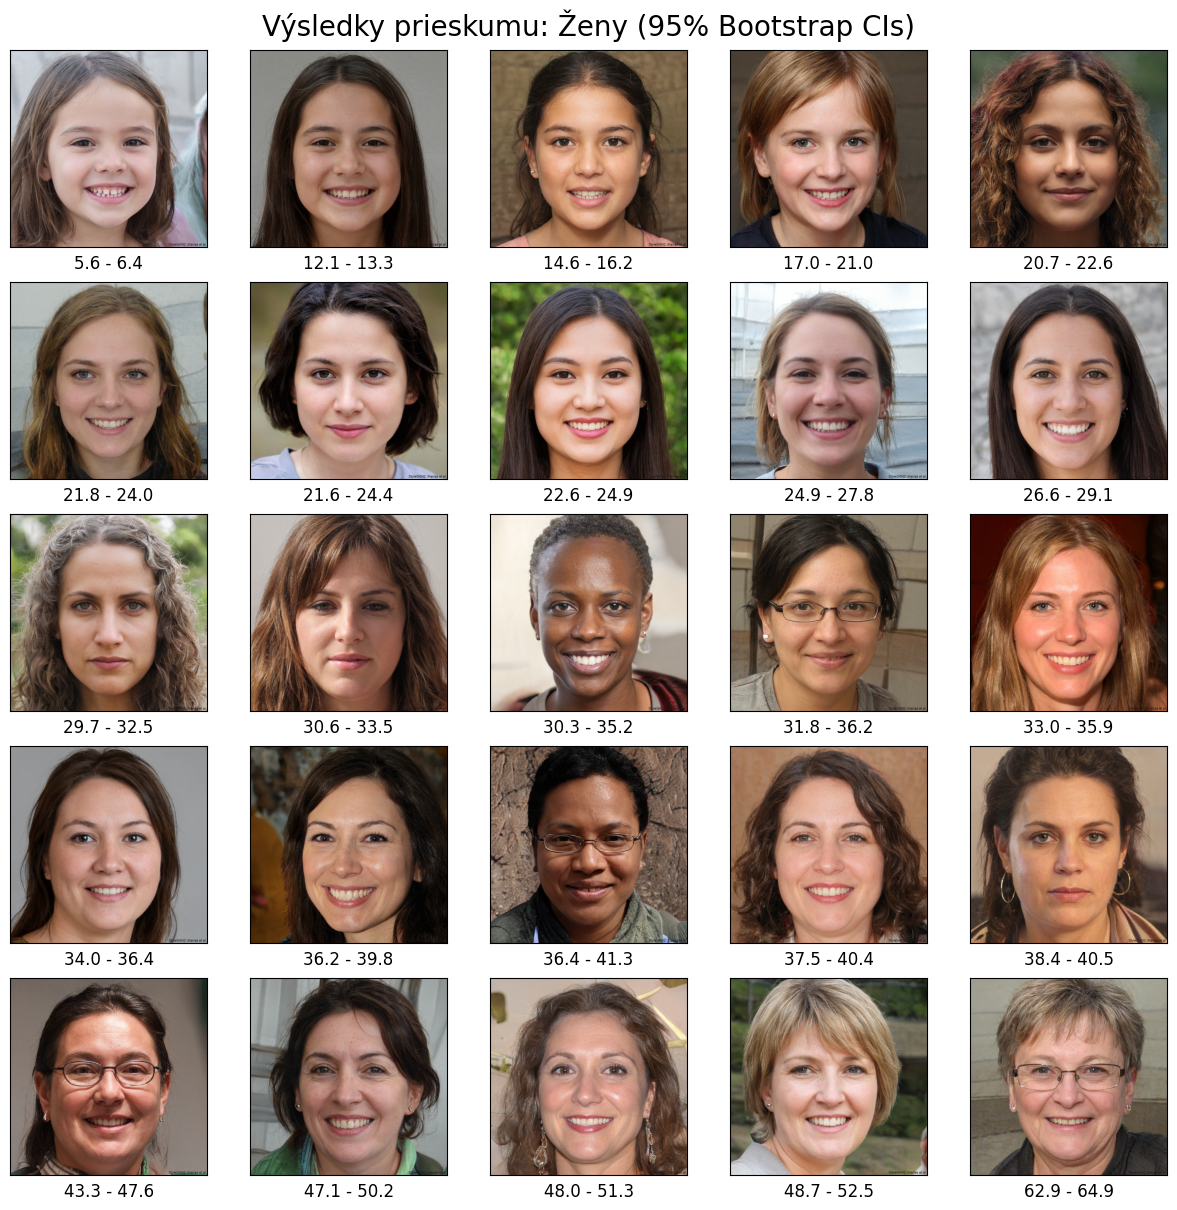

In [10]:
# vysledky prieskumu - intervalove odhady vstupnych obrazkov
for enum,arr in enumerate([men, women]):
    fig, ax = plt.subplots(5,5, figsize=(12,12), constrained_layout=True)
    fig.suptitle(f"Výsledky prieskumu: {['Muži', 'Ženy'][enum]} (95% Bootstrap CIs)", fontsize=20)
    for i in range(25):
        plt.setp(ax[i//5,i%5], xticks=[], yticks=[])
        ax[i//5,i%5].imshow(cv.cvtColor(arr[i].img, cv.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(f"{arr[i].ci[0]:.1f} - {arr[i].ci[1]:.1f}", y=-0.15, fontsize=12)
    plt.show()
